In [170]:
import pandas as pd
import seaborn as sns
import numpy as np
import ppscore as pps
import matplotlib.pyplot as plt

### Initial formatting and parsing

In [68]:
df = pd.read_excel("ACDC_Component_Cracks_2022.03.03-04(16).xlsx")

In [69]:
df.head()

,signalId,signalName,date,physicalSignalValue
0,132706,FA_Hoehenwert_HL_00,20220303,-40.0
1,132706,FA_Hoehenwert_HL_00,20220303,-50.0
2,132706,FA_Hoehenwert_HL_00,20220303,-60.0
3,132706,FA_Hoehenwert_HL_00,20220303,-30.0
4,132706,FA_Hoehenwert_HL_00,20220303,-10.0


In [70]:
df.signalName.unique()

array(['FA_Hoehenwert_HL_00', 'FA_BodyAcceleration_HL', 'ESP_v_Signal',
       'FA_BodyAcceleration_VL', 'FA_BodyAcceleration_VR',
       'FA_Hoehenwert_VL_00', 'FA_BodyAcceleration_HR',
       'FA_Hoehenwert_VR_00', 'FA_Hoehenwert_HR_00'], dtype=object)

In [71]:
dfESP = df[df.signalName == "ESP_v_Signal"]
dfFA = df[df.signalName != "ESP_v_Signal"]

In [72]:
dfsplit = dfFA.signalName.apply(lambda x:x.split("_"))
dfFA = dfFA.assign(
    signal = dfsplit.apply(lambda x: x[1]),
    position = dfsplit.apply(lambda x: x[2]),
).drop(columns=['signalId', 'date', 'signalName'])
dfsplit

0       [FA, Hoehenwert, HL, 00]
1       [FA, Hoehenwert, HL, 00]
2       [FA, Hoehenwert, HL, 00]
3       [FA, Hoehenwert, HL, 00]
4       [FA, Hoehenwert, HL, 00]
                  ...           
2022    [FA, Hoehenwert, HR, 00]
2023    [FA, Hoehenwert, HR, 00]
2024    [FA, Hoehenwert, HR, 00]
2025    [FA, Hoehenwert, HR, 00]
2026    [FA, Hoehenwert, HR, 00]
Name: signalName, Length: 1156, dtype: object

In [73]:
dfH = dfFA[dfFA.signal == "Hoehenwert"]

### Checking on the distribution of values for the hight

position
HL    AxesSubplot(0.125,0.125;0.775x0.755)
HR    AxesSubplot(0.125,0.125;0.775x0.755)
VL    AxesSubplot(0.125,0.125;0.775x0.755)
VR    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

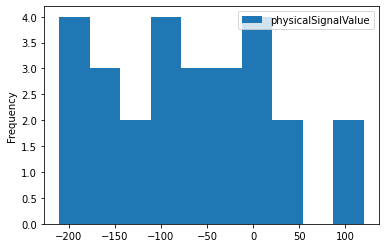

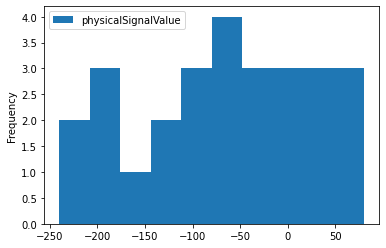

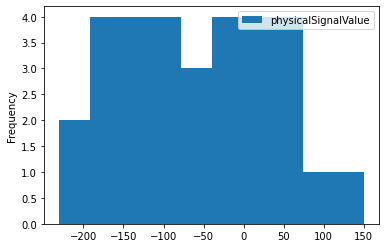

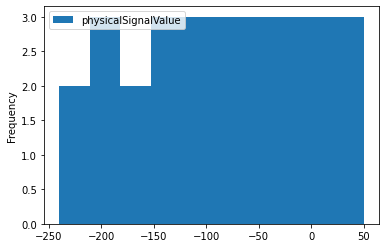

In [74]:
dfH.groupby("position").plot(kind="hist")

In [75]:
dfH.groupby("position").count()

,physicalSignalValue,signal
position,,
HL,27,28
HR,27,28
VL,31,32
VR,28,29


In [76]:
# in order to calculate the covariance matrix, we assume that the signal values on the four positions are mesured at the same time.
dfH = dfH.assign(count = dfH.groupby("position").cumcount())
sample_matrix_hohenwert = dfH.pivot(index='count', columns='position', values='physicalSignalValue').iloc[:27].fillna(axis=0, method='bfill')

In [77]:
sample_matrix_hohenwert

position,HL,HR,VL,VR
count,,,,
0,-40.0,-80.0,40.0,-60.0
1,-50.0,-30.0,-80.0,-80.0
2,-60.0,-60.0,-90.0,-50.0
3,-30.0,-70.0,-50.0,20.0
4,-10.0,-50.0,-60.0,-70.0
5,-20.0,-40.0,50.0,-30.0
6,0.0,-90.0,-70.0,-90.0
7,10.0,-20.0,-40.0,0.0
8,-70.0,-10.0,-20.0,-40.0


In [78]:
cov_matrix_hohenwert = sample_matrix_hohenwert.cov()

<AxesSubplot:xlabel='position', ylabel='position'>

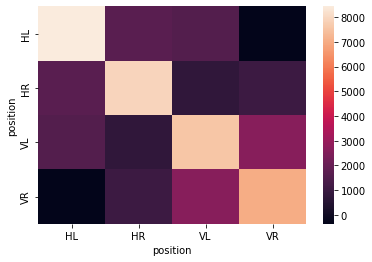

In [79]:
sns.heatmap(cov_matrix_hohenwert)

<AxesSubplot:xlabel='count'>

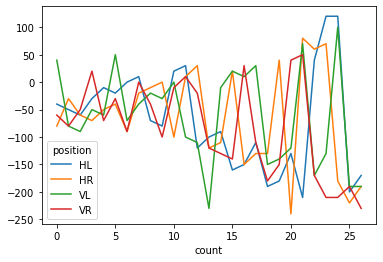

In [176]:
sample_matrix_hohenwert.plot(kind="line")

In [81]:
cov_matrix_hohenwert.describe()

position,HL,HR,VL,VR
count,4.000000,4.000000,4.000000,4.000000
mean,2829.166667,2840.384615,3123.824786,2576.495726
std,3851.274391,3395.956540,3051.241401,3196.987714
min,-358.547009,752.564103,752.564103,-358.547009
25%,1075.427350,953.525641,1353.205128,675.747863
50%,1620.940171,1354.487179,2095.584046,1829.131054
75%,3374.679487,3241.346154,3866.203704,3729.878917
max,8433.333333,7900.000000,7551.566952,7006.267806


### Data analyyis for body acceleration

In [82]:
df_body_acceleration = dfFA[dfFA.signal == "BodyAcceleration"]
df_body_acceleration

,physicalSignalValue,signal,position
28,2.300000e+16,BodyAcceleration,HL
29,-5.100000e+14,BodyAcceleration,HL
30,2.700000e+15,BodyAcceleration,HL
31,-3.300000e+15,BodyAcceleration,HL
32,1.900000e+16,BodyAcceleration,HL
...,...,...,...
1965,-2.090000e+02,BodyAcceleration,HR
1966,2.330000e+15,BodyAcceleration,HR
1967,2.290000e+16,BodyAcceleration,HR
1968,-3.270000e+16,BodyAcceleration,HR


# Checking on the distribution of values for the body acceleration

position
HL    AxesSubplot(0.125,0.125;0.775x0.755)
HR    AxesSubplot(0.125,0.125;0.775x0.755)
VL    AxesSubplot(0.125,0.125;0.775x0.755)
VR    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

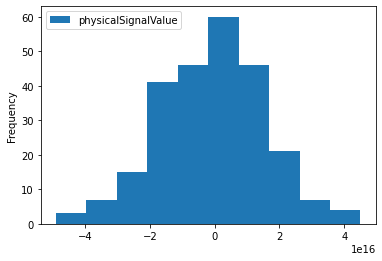

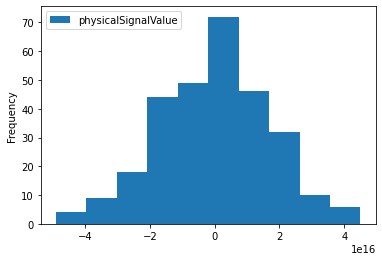

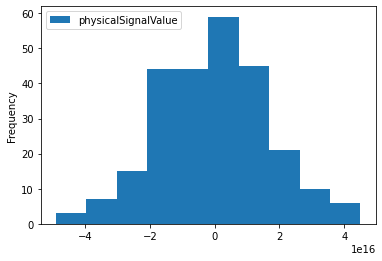

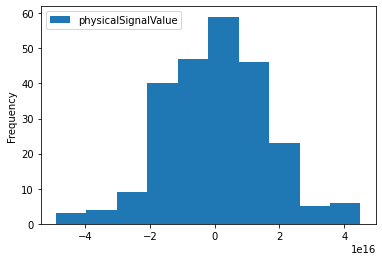

In [83]:
df_body_acceleration.groupby("position").plot(kind="hist")

In [84]:
df.signalId.unique()

array([132706, 132705, 106001, 132703, 132707, 132704, 132710, 132709,
       132708])

In [85]:
df_body_acceleration.groupby("position").count()

,physicalSignalValue,signal
position,,
HL,250,251
HR,290,290
VL,254,255
VR,242,243


In [86]:
# in order to calculate the covariance matrix, we assume that the signal values on the four positions are mesured at the same time.
df_body_acceleration = df_body_acceleration.assign(count = df_body_acceleration.groupby("position").cumcount())
sample_matrix_acceleration = df_body_acceleration.pivot(index='count', columns='position', values='physicalSignalValue').iloc[:240].fillna(axis=0, method='bfill')

In [87]:
sample_matrix_acceleration

position,HL,HR,VL,VR
count,,,,
0,2.300000e+16,-2.500000e+01,-2.700000e+15,-2.700000e+15
1,-5.100000e+14,-3.500000e+16,3.300000e+16,-7.000000e+15
2,2.700000e+15,2.100000e+16,2.300000e+16,-8.700000e+15
3,-3.300000e+15,7.000000e+15,-1.300000e+14,1.300000e+16
4,1.900000e+16,4.900000e+14,2.700000e+15,7.100000e+15
...,...,...,...,...
235,-1.830000e+16,-2.850000e+15,-3.490000e+16,-3.430000e+16
236,3.390000e+16,-2.230000e+16,3.050000e+16,2.470000e+16
237,-2.070000e+16,1.970000e+16,1.750000e+02,2.510000e+16


In [88]:
cov_matrix_acceleration = sample_matrix_acceleration.cov()
cov_matrix_acceleration

position,HL,HR,VL,VR
position,,,,
HL,2.676115e+32,-1.287570e+31,2.284605e+31,1.654319e+31
HR,-1.287570e+31,2.604751e+32,-1.441294e+31,4.125477e+31
VL,2.284605e+31,-1.441294e+31,2.796367e+32,8.283682e+30
VR,1.654319e+31,4.125477e+31,8.283682e+30,2.614128e+32


<AxesSubplot:xlabel='position', ylabel='position'>

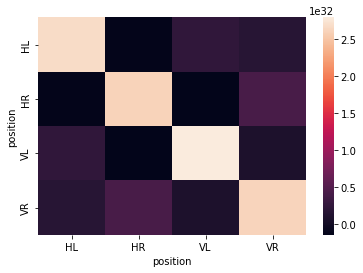

In [89]:
sns.heatmap(cov_matrix_acceleration)

### Plotting the first 20 values of the acceleration data

<AxesSubplot:xlabel='count'>

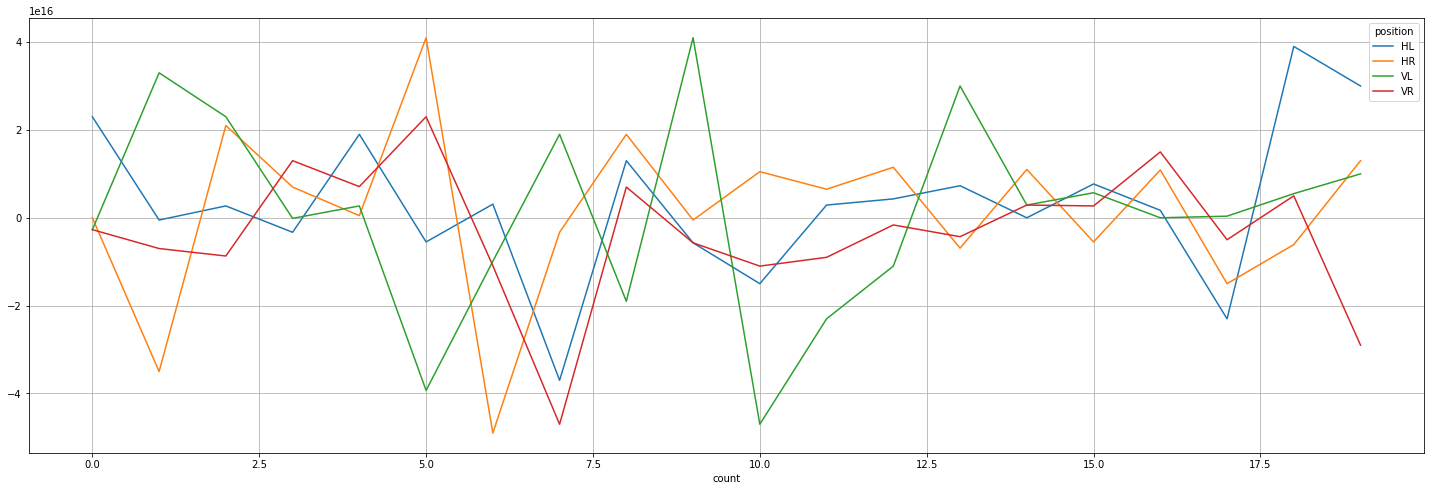

In [129]:
sample_matrix_acceleration[:20].plot(kind="line", figsize=(25,8), grid=True)


### Plotting the first 100 values of the acceleration data

<AxesSubplot:xlabel='count'>

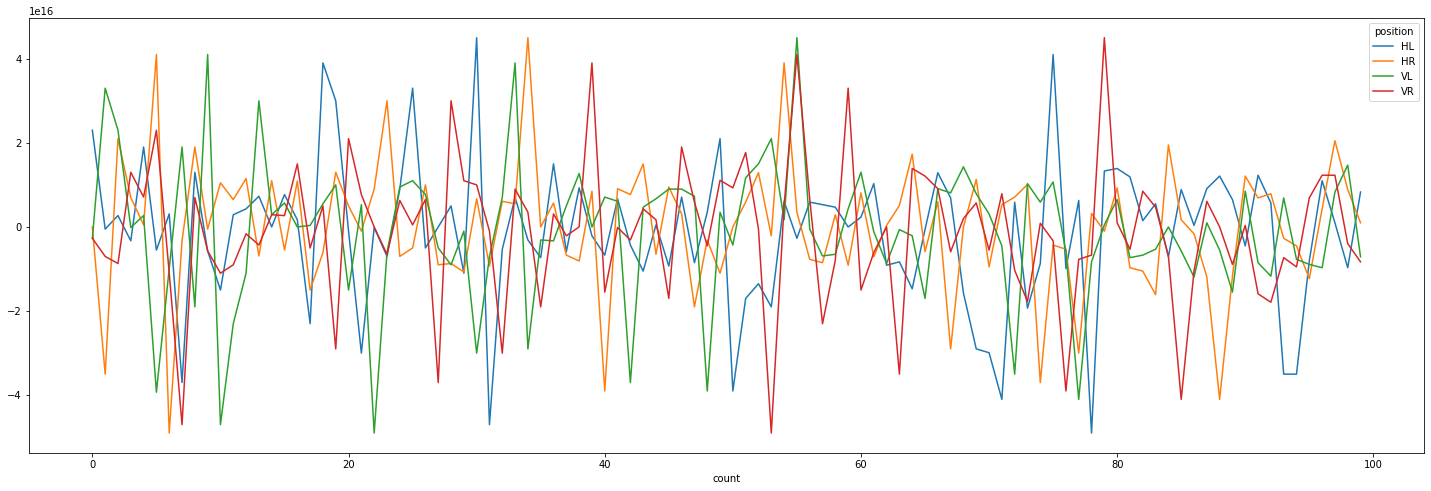

In [96]:
sample_matrix_acceleration[:100].plot(kind="line", figsize=(25,8))

### Plotting all the values for the acceleration data 

<AxesSubplot:xlabel='count'>

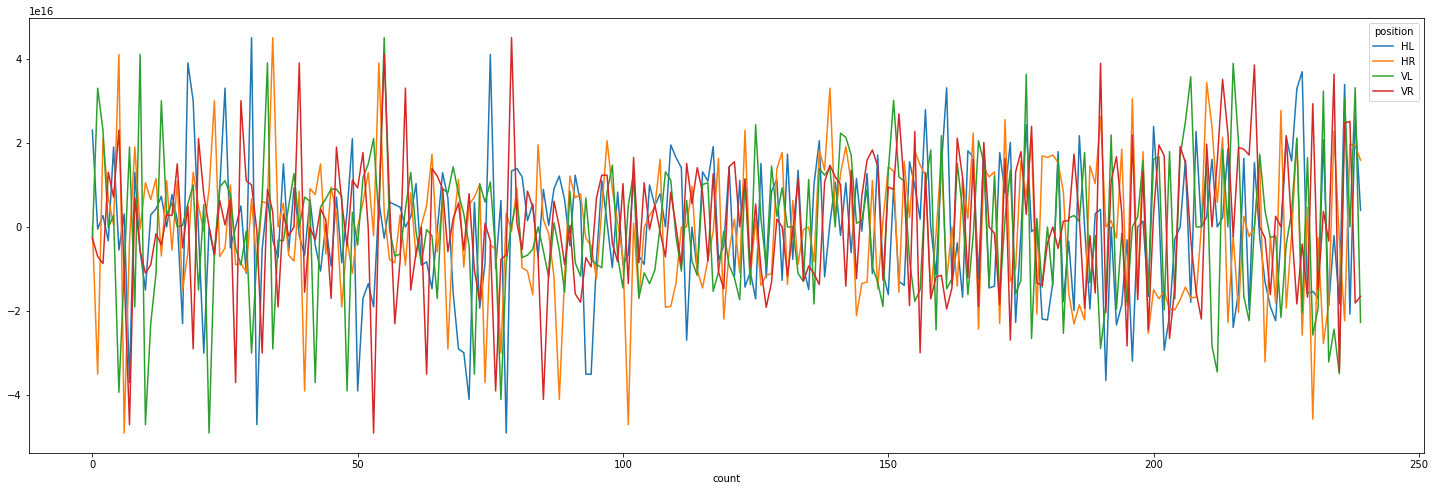

In [97]:
sample_matrix_acceleration.plot(kind="line", figsize=(25,8))

<AxesSubplot:xlabel='position'>

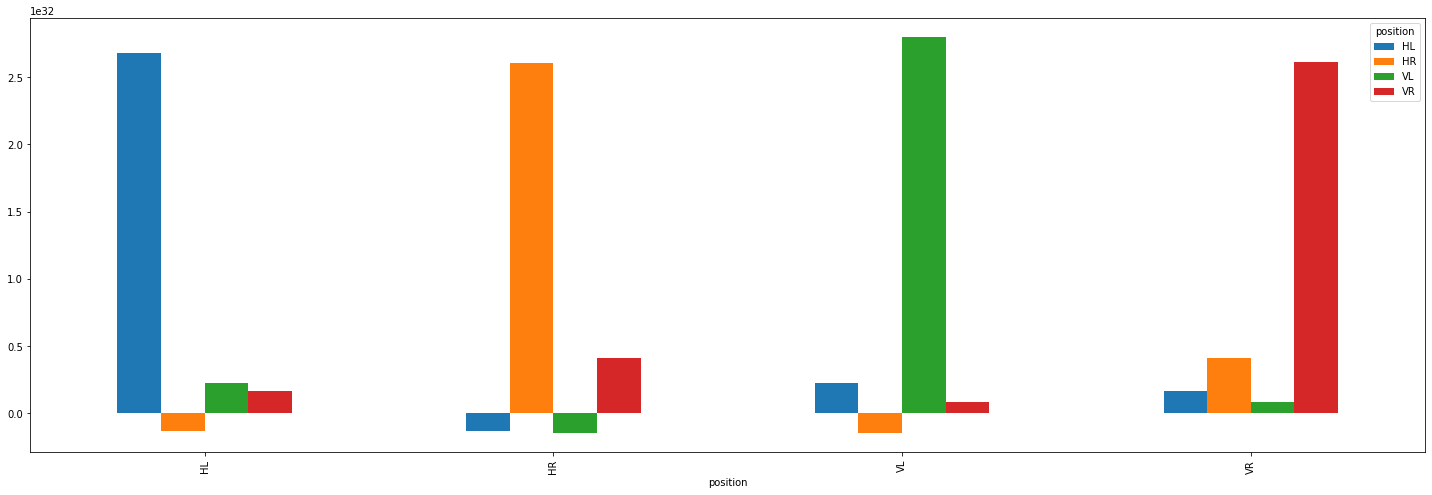

In [98]:
cov_matrix_acceleration.plot(kind="bar", figsize=(25,8))

## Nornalization of the covariance matrix: 
### Pearson correlation coefficient is a measure of linear correlation between two sets of data. It is the ratio between the covariance[3] of two variables and the product of their standard deviations; thus it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1. As with covariance itself, the measure can only reflect a linear correlation of variables, and ignores many other types of relationship or correlation.

position        HL        HR        VL        VR
position                                        
HL        1.000000 -0.048768  0.083514  0.062547
HR       -0.048768  1.000000 -0.053404  0.158098
VL        0.083514 -0.053404  1.000000  0.030638
VR        0.062547  0.158098  0.030638  1.000000


<AxesSubplot:xlabel='position', ylabel='position'>

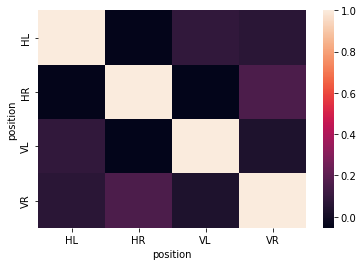

In [107]:
#my_rho = np.corrcoef(sample_matrix_acceleration)
normalized_cov = sample_matrix_acceleration.corr(method='pearson')
print(normalized_cov)
sns.heatmap(normalized_cov)

position        HL        HR        VL        VR
position                                        
HL        1.000000  0.206861  0.194657 -0.046645
HR        0.206861  1.000000  0.097434  0.137171
VL        0.194657  0.097434  1.000000  0.362637
VR       -0.046645  0.137171  0.362637  1.000000


<AxesSubplot:xlabel='position', ylabel='position'>

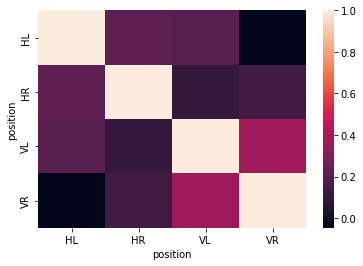

In [108]:
normalized_cov = sample_matrix_hohenwert.corr(method='pearson')
print(normalized_cov)
sns.heatmap(normalized_cov)

### Non Linearity analysis

<AxesSubplot:xlabel='count'>

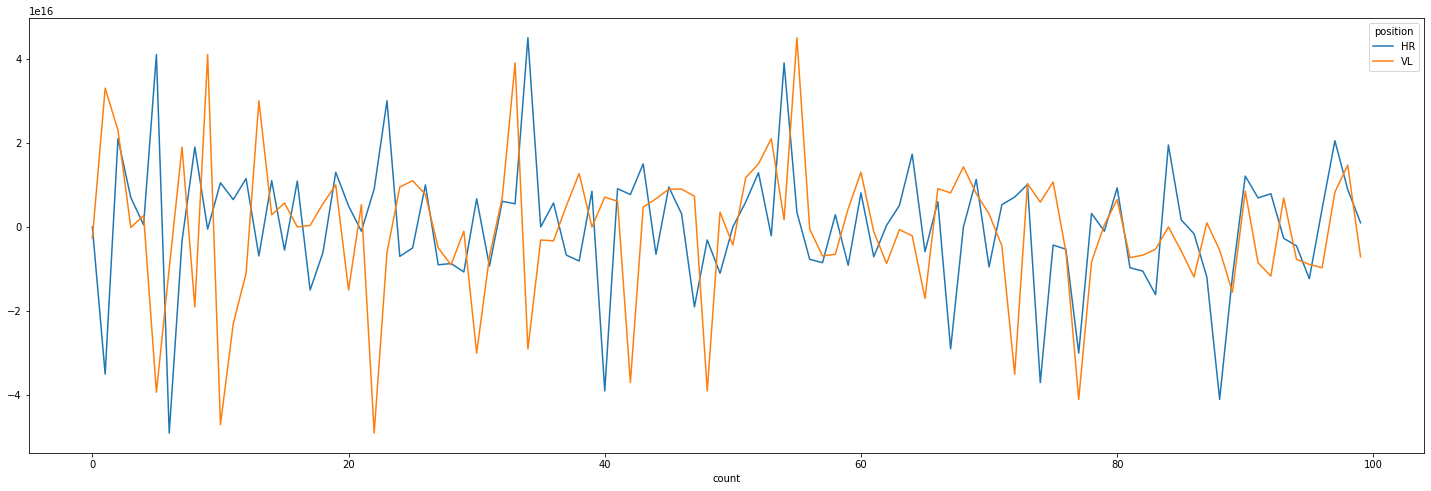

In [112]:
sample_matrix_acceleration[['HR','VL']][:100].plot(kind="line", figsize=(25,8))

<AxesSubplot:xlabel='HR', ylabel='VL'>

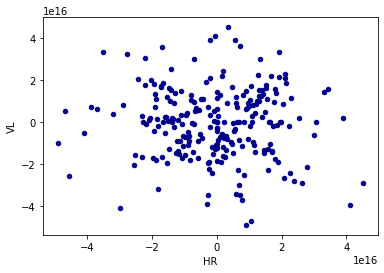

In [128]:
sample_matrix_acceleration.plot.scatter(x='HR', y='VL', c='DarkBlue')

### Predictive Power Score

In [125]:
pps.score(sample_matrix_acceleration, 'VR', 'VL')

{'x': 'VR',
 'y': 'VL',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 1.3040083333333342e+16,
 'model_score': 1.8328124999999996e+16,
 'model': DecisionTreeRegressor()}

<AxesSubplot:xlabel='VR', ylabel='VL'>

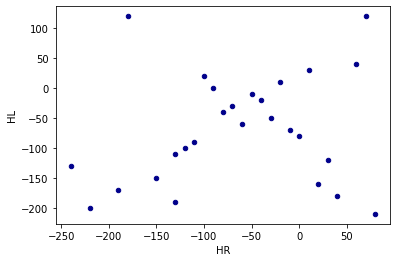

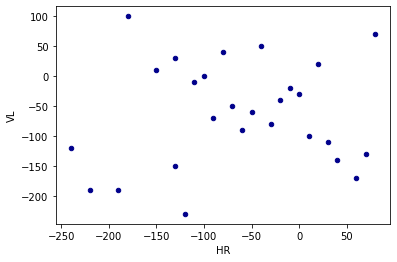

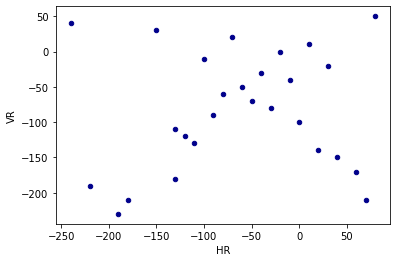

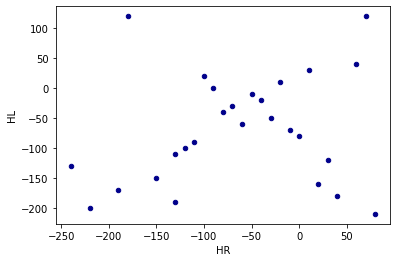

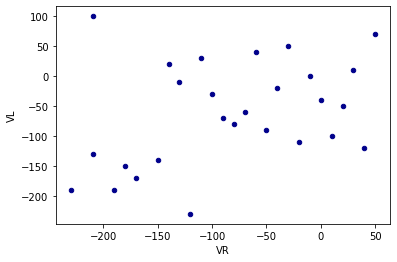

In [136]:
sample_matrix_hohenwert.plot.scatter(x='HR', y='HL', c='DarkBlue')
sample_matrix_hohenwert.plot.scatter(x='HR', y='VL', c='DarkBlue')
sample_matrix_hohenwert.plot.scatter(x='HR', y='VR', c='DarkBlue')
sample_matrix_hohenwert.plot.scatter(x='HR', y='HL', c='DarkBlue')
sample_matrix_hohenwert.plot.scatter(x='VR', y='VL', c='DarkBlue')

### Dynamic Time Warping

In [141]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import sklearn

In [163]:
scaler = sklearn.preprocessing.StandardScaler().fit(np.array(sample_matrix_acceleration['HR']).reshape(-1, 1))
sample_matrix_acceleration_HR_scaled = scaler.transform(np.array(sample_matrix_acceleration['HR']).reshape(-1, 1))

scaler = sklearn.preprocessing.StandardScaler().fit(np.array(sample_matrix_hohenwert['HR']).reshape(-1,1))
sample_matrix_hohenwer_HR_scaled = scaler.transform(np.array(sample_matrix_hohenwert['HR']).reshape(-1,1))

distance, path = fastdtw(sample_matrix_acceleration_HR_scaled, sample_matrix_hohenwer_HR_scaled, dist=euclidean)
#print(distance)
#print(path)
indices_hohenwert, indices_acc = [], []
for counter, _ in enumerate(path):
    indices_hohenwert.append(path[counter][1])
    indices_acc.append(path[counter][0])


In [173]:
sampled_acc_HR = sample_matrix_acceleration['HR'].iloc[indices_acc]
sampled_hohenwert_HR = sample_matrix_hohenwert['HR'].iloc[indices_hohenwert]

count
0     -2.500000e+01
1     -3.500000e+16
2      2.100000e+16
3      7.000000e+15
4      4.900000e+14
           ...     
235   -2.850000e+15
236   -2.230000e+16
237    1.970000e+16
238    1.930000e+16
239    1.590000e+16
Name: HR, Length: 241, dtype: float64

count
0     -80.0
0     -80.0
1     -30.0
1     -30.0
1     -30.0
      ...  
23     70.0
24   -180.0
24   -180.0
25   -220.0
26   -190.0
Name: HR, Length: 241, dtype: float64

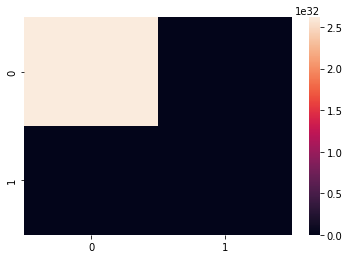

In [178]:
cov_matrix_acc_hohenwert = np.cov(sampled_acc_HR,sampled_hohenwert_HR)
sns.heatmap(cov_matrix_acc_hohenwert)
sampled_hohenwert_HR

In [179]:
df = pd.DataFrame({'sampled_acc_HR':sampled_acc_HR.values, 'sampled_hohenwert_HR':sampled_hohenwert_HR})
pearson_corr = df.corr(method='pearson')

In [180]:
pearson_corr

,sampled_acc_HR,sampled_hohenwert_HR
sampled_acc_HR,1.000000,0.340687
sampled_hohenwert_HR,0.340687,1.000000


### taking the x subsequent acceleration points before and after a given height measurement and then average over those

In [181]:
sample_matrix_acceleration['HR'], sample_matrix_hohenwert['HR']

(count
 0     -2.500000e+01
 1     -3.500000e+16
 2      2.100000e+16
 3      7.000000e+15
 4      4.900000e+14
            ...     
 235   -2.850000e+15
 236   -2.230000e+16
 237    1.970000e+16
 238    1.930000e+16
 239    1.590000e+16
 Name: HR, Length: 240, dtype: float64,
 count
 0     -80.0
 1     -30.0
 2     -60.0
 3     -70.0
 4     -50.0
 5     -40.0
 6     -90.0
 7     -20.0
 8     -10.0
 9       0.0
 10   -100.0
 11     10.0
 12     30.0
 13   -120.0
 14   -110.0
 15     20.0
 16   -150.0
 17   -130.0
 18   -130.0
 19     40.0
 20   -240.0
 21     80.0
 22     60.0
 23     70.0
 24   -180.0
 25   -220.0
 26   -190.0
 Name: HR, dtype: float64)

In [229]:
print(239 / 27) 
list_1 = [1,2,3,4,5]
list_2 = [1,2,3,4,5,6,7,8,9,10]
new_acc = []
for average_counter in range(0,10,2):
    #print(average_counter)
    val = list_2[average_counter:average_counter+1]
    print(val)


8.851851851851851
[1]
[3]
[5]
[7]
[9]


In [245]:
new_acc = []
#for hohenwert_counter, hohenwert in enumerate(sample_matrix_hohenwert['HR']):
for average_counter in range(0,239,8):
    #if average_counter == 0: continue
    val = sample_matrix_acceleration['HR'][average_counter-8:average_counter+8].mean()
    new_acc.append(val)

len(new_acc), new_acc

(30,
 [nan,
  1736250000000042.5,
  5711875000000122.0,
  800000000000229.5,
  1437500000000140.2,
  2243750000000050.8,
  1562500000000044.8,
  1823125000000024.0,
  -1276249999999989.2,
  -3855624999999826.0,
  -4783124999999822.0,
  -4039374999999989.0,
  -5064999999999978.0,
  -3979374999999987.5,
  -3603749999999991.0,
  -3560624999999980.0,
  -1479374999999974.0,
  6545000000000035.0,
  4926250000000018.0,
  435625000000010.0,
  1933125000000025.8,
  2258125000000020.5,
  7243750000000006.0,
  3318750000000022.5,
  -1404999999999975.5,
  -8073749999999986.0,
  -5694999999999976.0,
  -840624999999988.8,
  -6193750000000005.0,
  -2207499999999997.5])

In [246]:
new_acc = new_acc[1:]
len(new_acc)
new_acc = new_acc[:-2]
len(new_acc)

27

<AxesSubplot:>

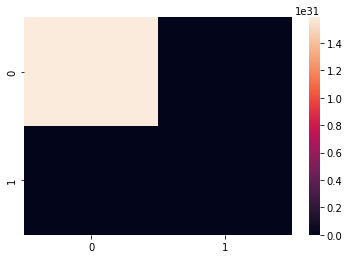

In [250]:
cov_hohenwer_acc_averaged = np.cov(new_acc,sample_matrix_hohenwert['HR'])
sns.heatmap(cov_hohenwer_acc_averaged)